<a href="https://colab.research.google.com/github/fedjkeee/HW_data_analysis/blob/main/hw_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [2]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
  plt.figure(figsize=figsize)
  plt.barh(np.arange(len(bars_length)),bars_length, label=labels,color='#a3c9df')
  plt.yticks(np.arange(len(bars_length)), yticks_labels, size=25)
  plt.xticks(size=25)
  bars_lengths = np.where(bars_length<0, 0, bars_length)
  for i,(length,label) in enumerate(zip(bars_lengths,labels)):
    plt.text(length, i, label, size=25, verticalalignment='center')
  plt.grid(True)
  plt.show()

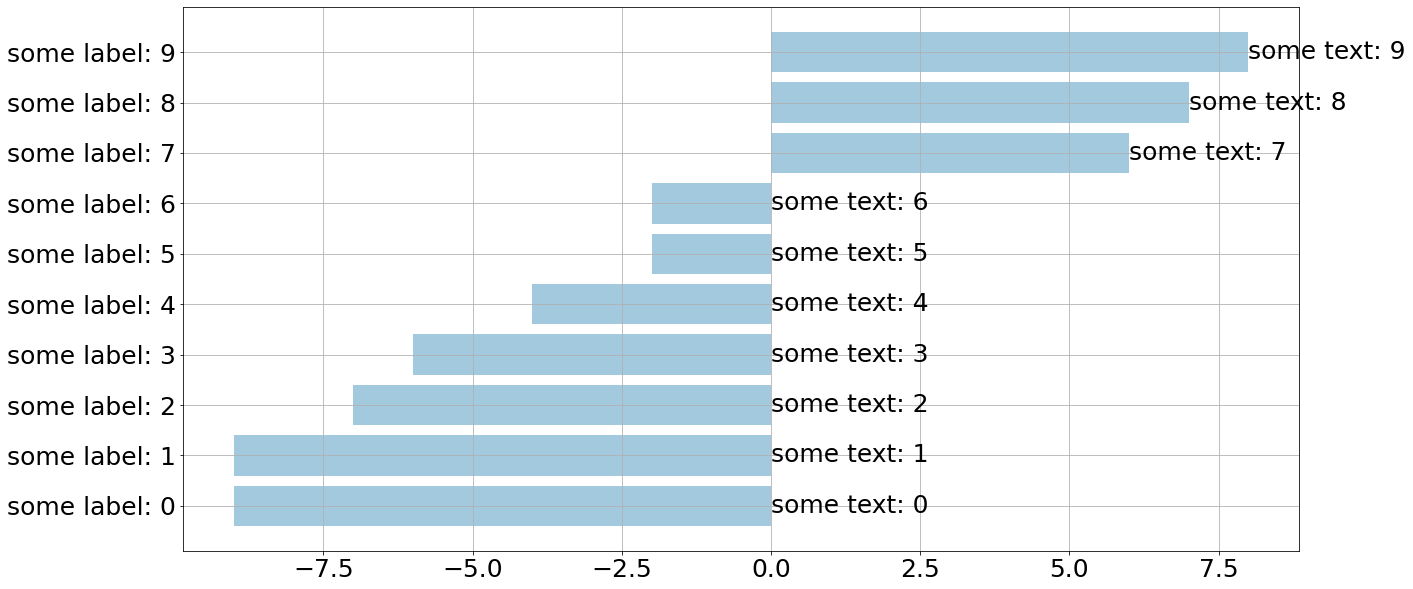

In [3]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [4]:
def plot_time_probabilities(probabilities_in_time, figsize):
  colors = plt.cm.RdBu(np.linspace(0,1,10))
  plt.figure(figsize=figsize)
  line=0
  for i,column in enumerate(probabilities_in_time.columns):
    plt.fill_between(probabilities_in_time.index,
                          probabilities_in_time[i]+line,
                          line,
                          color=colors[i],
                          label='Probability: ' + str(column))
    line+=probabilities_in_time[i]
  plt.grid(axis='x')   
  plt.legend(loc='lower left')
  plt.show()

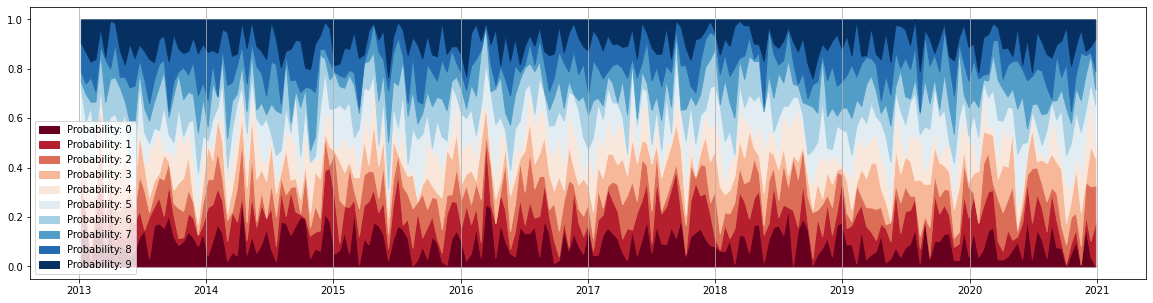

In [5]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [6]:
def plot_intraday_ts(intraday_ts, figsize):
    fig, ax = plt.subplots(figsize = figsize)
    

    df = pd.DataFrame(intraday_ts)
    df.fillna(df.mean(),inplace=True)
    c = ax.pcolor(pd.DataFrame(data=df[:-1].values.reshape(151,24),columns=pd.date_range('00:00','23:00',freq='1H').strftime('%H:%M'),index=pd.date_range('2020-02-02', '2020-07-01', freq='1D').strftime('%B %d')).T, cmap= cm.RdBu, edgecolors='white', linewidth=2)
    ax.set_xlabel('Дата', fontsize=14)
    ax.set_ylabel('Время', fontsize=14)
    ax.yaxis.tick_right()
    ax.set_xticks(range(0, 151, 2))
    ax.set_xticklabels(pd.date_range('2020-02-02', '2020-07-01', freq='2D').strftime('%B %d'),fontsize=8, rotation=40,alpha=0.8)
    ax.set_yticks(range(0, 24,2))
    ax.set_yticklabels(pd.date_range('01:00','23:00',freq='2H').strftime('%H:%M'),fontsize=9, rotation=0,alpha=0.8)
    ax.yaxis.set_ticks_position('right')
    ax.xaxis.set_ticks_position('bottom')
    fig.colorbar(c, ax=[ax], location='left',pad=0.02)
    plt.show()

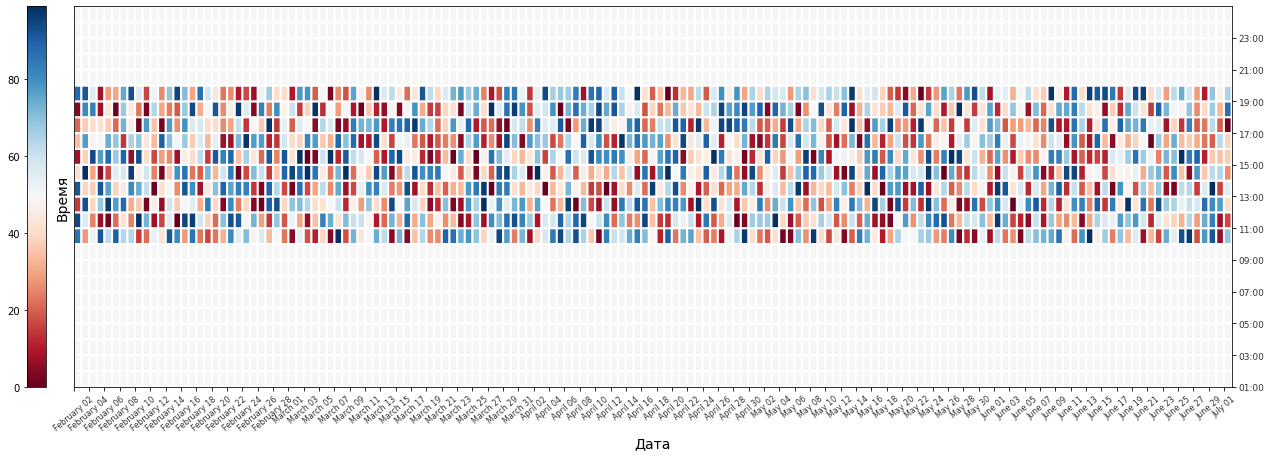

In [7]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)